# Gráfico de superfície de uma imagem

Este notebook tem um objetivo principalmente pedagógico, para ajudar a entender o que representam as cores em uma imagem, como o que obtemos ao utilizar o `plt.imshow`.

Começamos importando os pacotes relevantes.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

Depois carregamos os dados, que neste caso é a imagem na banda *r* da galáxia NGC 4030.

In [2]:
r = fits.getdata('frame-r-006793-1-0130.fits')

Vamos graficar essa imagem como estávamos fazendo antes (com um temperinho a mais).

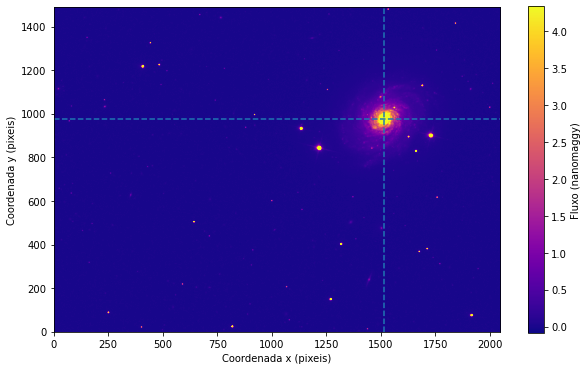

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lower_limit = np.percentile(r, 0.1)
upper_limit = np.percentile(r, 99.9)
im = ax.imshow(r, vmin=lower_limit, vmax=upper_limit, cmap='plasma', origin='lower')
ax.set_xlabel('Coordenada x (pixeis)')
ax.set_ylabel('Coordenada y (pixeis)')
ax.axvline(1515, linestyle='dashed')
ax.axhline(977, linestyle='dashed')
plt.colorbar(im, ax=ax, label='Fluxo (nanomaggy)', use_gridspec=True)

Agora vamos fazer um corte na imagem, selecionando só um pedaço centrado no núcleo da galáxia. Pela imagem acima parece que o centro da galáxia está nas coordenadas $(x_0, y_0) = (1515, 977)$. 

In [4]:
x0, y0 = 1515, 977
half_width = 50
z = r[y0 - half_width:y0 + half_width, x0 - half_width:x0 + half_width]

Podemos fazer uma nova imagem só com esse pedaço para ver se cortamos a parte certa da imagem original

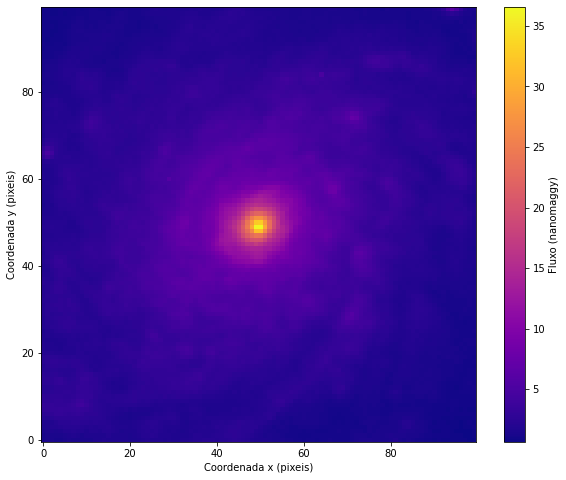

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
im = ax.imshow(z, cmap='plasma', origin='lower')
ax.set_xlabel('Coordenada x (pixeis)')
ax.set_ylabel('Coordenada y (pixeis)')
plt.colorbar(im, ax=ax, label='Fluxo (nanomaggy)')

Precisamos agora criar vetores de coordenadas x e y.

In [6]:
y, x = np.indices(z.shape)
print(x.shape, z.shape)

(100, 100) (100, 100)


Finalmente vamos fazer o gráfico de superfície. Vou inverter a mapa de cores para ficar mais fácil de ver o pico do fluxo.

*Dica: na maioria dos casos adicionar um "_r" no final do nome do mapa de cores produz um mapa invertido. O mapa "plasma" normalmente tem os maiores valores como amarelo, com o "_r" fazemos os maiores valores ficarem azuis.*

Text(0.5, 0, 'Fluxo (nanomaggy)')

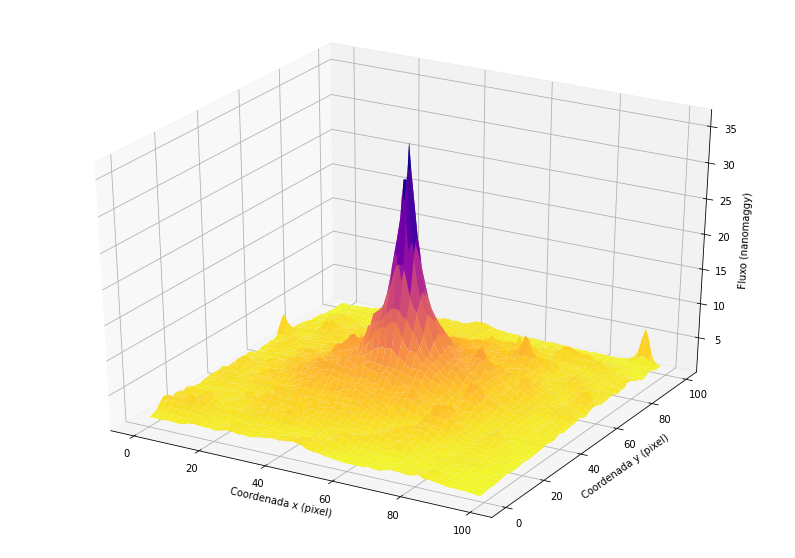

In [7]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='plasma_r')
ax.set_xlabel('Coordenada x (pixel)')
ax.set_ylabel('Coordenada y (pixel)')
ax.set_zlabel('Fluxo (nanomaggy)')

Agora vamos tentar fazer a mesma coisa, mas vamos limitar os valores de fluxo exatamente como na primeira imagem deste notebook, entre os percentis 0.1 e 99.9.

Note que aquilo que na imagem era uma cor só a partir de um certo valor, representa um platô na dimensão $z$.

Text(0.5, 0, 'Fluxo (nanomaggy)')

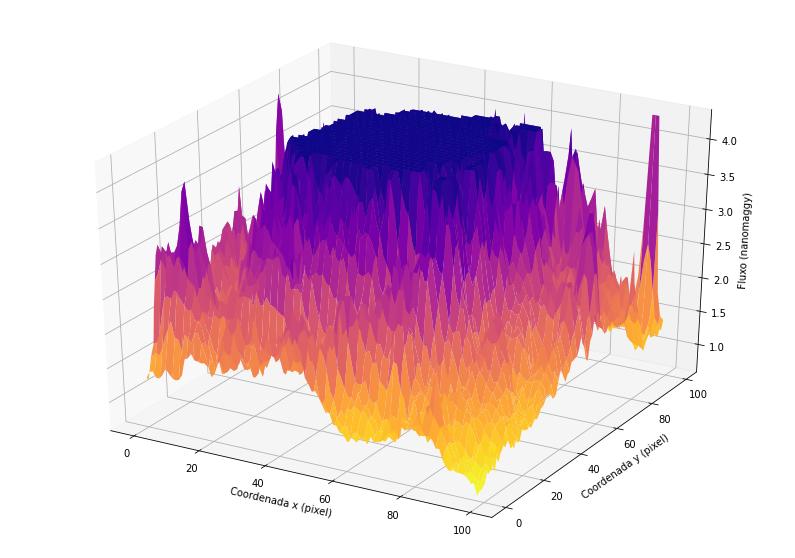

In [8]:
z[z > upper_limit] = upper_limit
z[z < lower_limit] = lower_limit


fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='plasma_r')
ax.set_xlabel('Coordenada x (pixel)')
ax.set_ylabel('Coordenada y (pixel)')
ax.set_zlabel('Fluxo (nanomaggy)')